In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/ML Lab Data/dataset_target.csv',index_col=0)

In [4]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

##### Entering moving Average

In [6]:
## We are taking 50 moving average
## That is a total of 50 days data

In [7]:
df['Moving_av']= df['Adj Close'].rolling(window=50,min_periods=0).mean()

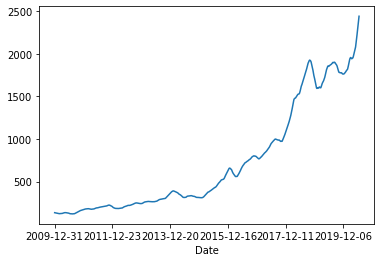

In [8]:
df['Moving_av'].plot()

In [9]:
i=1
rate_increase_in_vol=[0]
rate_increase_in_adj_close=[0]


while i<len(df):
    rate_increase_in_vol.append(df.iloc[i]['Volume']-df.iloc[i-1]['Volume'])
    rate_increase_in_adj_close.append(df.iloc[i]['Adj Close']-df.iloc[i-1]['Adj Close'])
    i+=1
    
df['Increase_in_vol']=rate_increase_in_vol
df['Increase_in_adj_close']=rate_increase_in_adj_close    

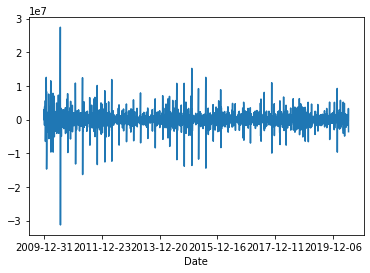

In [10]:
df['Increase_in_vol'].plot()

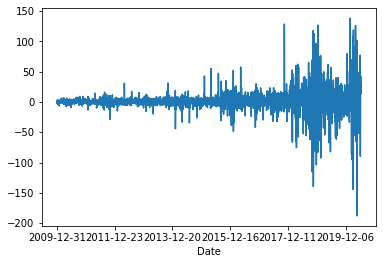

In [11]:
df['Increase_in_adj_close'].plot()

In [12]:
df.to_csv("dataset_target_2.csv",index=False)

In [13]:
df.columns


Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Moving_av',
       'Increase_in_vol', 'Increase_in_adj_close'],
      dtype='object')

In [14]:
df=pd.read_csv('/content/drive/MyDrive/ML Lab Data/AMZN.csv')

In [15]:
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [16]:
Dates=[]
i=0
while i<len(df):
		Dates.append(df.iloc[i]['Date'])
		i+=1

In [17]:
df2=pd.read_csv('dataset_target_2.csv')
df2['Date']=Dates
df2.to_csv("dataset_target_2.csv",index=False)

In [18]:
df=pd.read_csv('/content/drive/MyDrive/ML Lab Data/Dataset_main.csv')

In [19]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Moving_av',
       'Increase_in_vol', 'Increase_in_adj_close', 'MMM',
       ...
       'FITB', 'FE', 'FRC', 'FISV', 'FLT', 'FLIR', 'FLS', 'FMC', 'F', 'Date'],
      dtype='object', length=207)

In [20]:
!pip install mpl_finance

In [21]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/ML Lab Data/AMZN.csv',index_col=0,parse_dates=True)

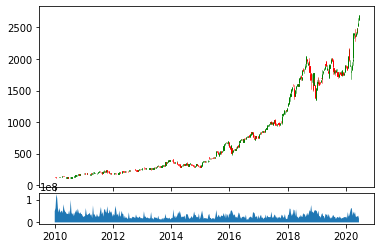

In [22]:
df_ohlc= df['Adj Close'].resample('10D').ohlc()
df_volume=df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace=True)
df_ohlc['Date']=df_ohlc['Date'].map(mdates.date2num)



ax1=plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2=plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1 , sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1,df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)

### Dataset Preprocessing

In [23]:
df1=pd.read_csv('/content/drive/MyDrive/ML Lab Data/dataset_target.csv')
col1=df1.columns
print(col1)

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [24]:
df2=pd.read_csv('/content/drive/MyDrive/ML Lab Data/dataset_target_2.csv')
col2=df2.columns
print(col2)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Moving_av',
       'Increase_in_vol', 'Increase_in_adj_close', 'Date'],
      dtype='object')


In [25]:
df3=pd.read_csv('/content/drive/MyDrive/ML Lab Data/Dataset_main.csv')
col3=df3.columns
print(col3)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Moving_av',
       'Increase_in_vol', 'Increase_in_adj_close', 'MMM',
       ...
       'FITB', 'FE', 'FRC', 'FISV', 'FLT', 'FLIR', 'FLS', 'FMC', 'F', 'Date'],
      dtype='object', length=207)


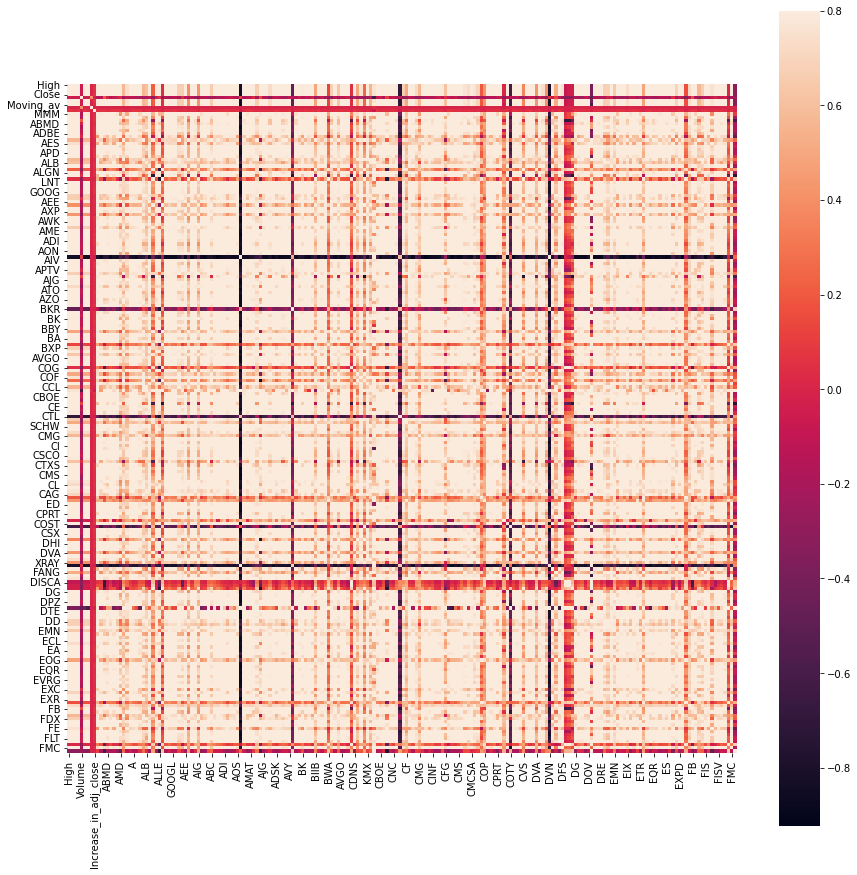

In [26]:
import seaborn as sb
C_mat = df3.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [28]:
df3.fillna(0, inplace=True)

In [29]:
y_df=df3[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']]

In [30]:
col_y=y_df.columns
print(col_y)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [31]:
y_df_mod=y_df.drop(['Adj Close','Volume'],axis=1)

In [32]:
y_df_mod.columns

Index(['High', 'Low', 'Open', 'Close'], dtype='object')

In [33]:
Drop_cols=col_y

In [34]:
Drop_cols=Drop_cols.tolist()

In [35]:
Drop_cols.append('Date')


In [36]:
X_df=df3.drop(Drop_cols,axis=1)

In [37]:
X_df.columns

Index(['Moving_av', 'Increase_in_vol', 'Increase_in_adj_close', 'MMM', 'ABT',
       'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE',
       ...
       'FIS', 'FITB', 'FE', 'FRC', 'FISV', 'FLT', 'FLIR', 'FLS', 'FMC', 'F'],
      dtype='object', length=200)

In [38]:
X=X_df.values
y = y_df_mod.values

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [40]:
X_train.shape

(1845, 200)

### Applying RNN

In [41]:
import datetime as dt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [42]:
df1=pd.read_csv('/content/drive/MyDrive/ML Lab Data/dataset_target.csv')

In [44]:
df2=pd.read_csv('/content/drive/MyDrive/ML Lab Data/dataset_target_2.csv')

In [45]:
df2.head()

,High,Low,Open,Close,Volume,Adj Close,Moving_av,Increase_in_vol,Increase_in_adj_close,Date
0,137.279999,134.520004,137.089996,134.520004,4523000,134.520004,134.520004,0.0,0.000000,2009-12-31
1,136.610001,133.139999,136.250000,133.899994,7599900,133.899994,134.209999,3076900.0,-0.620010,2010-01-04
2,135.479996,131.809998,133.429993,134.690002,8851900,134.690002,134.370000,1252000.0,0.790009,2010-01-05
3,134.729996,131.649994,134.600006,132.250000,7178800,132.250000,133.840000,-1673100.0,-2.440002,2010-01-06
4,132.320007,128.800003,132.009995,130.000000,11030200,130.000000,133.072000,3851400.0,-2.250000,2010-01-07


In [46]:
df_main=df2.drop(['Date'],axis=1)

In [47]:
df_main.head()

,High,Low,Open,Close,Volume,Adj Close,Moving_av,Increase_in_vol,Increase_in_adj_close
0,137.279999,134.520004,137.089996,134.520004,4523000,134.520004,134.520004,0.0,0.000000
1,136.610001,133.139999,136.250000,133.899994,7599900,133.899994,134.209999,3076900.0,-0.620010
2,135.479996,131.809998,133.429993,134.690002,8851900,134.690002,134.370000,1252000.0,0.790009
3,134.729996,131.649994,134.600006,132.250000,7178800,132.250000,133.840000,-1673100.0,-2.440002
4,132.320007,128.800003,132.009995,130.000000,11030200,130.000000,133.072000,3851400.0,-2.250000


In [48]:
print(len(df_main))

2636


In [49]:
df_train=df_main[:2200]

In [50]:
df_train.head()

,High,Low,Open,Close,Volume,Adj Close,Moving_av,Increase_in_vol,Increase_in_adj_close
0,137.279999,134.520004,137.089996,134.520004,4523000,134.520004,134.520004,0.0,0.000000
1,136.610001,133.139999,136.250000,133.899994,7599900,133.899994,134.209999,3076900.0,-0.620010
2,135.479996,131.809998,133.429993,134.690002,8851900,134.690002,134.370000,1252000.0,0.790009
3,134.729996,131.649994,134.600006,132.250000,7178800,132.250000,133.840000,-1673100.0,-2.440002
4,132.320007,128.800003,132.009995,130.000000,11030200,130.000000,133.072000,3851400.0,-2.250000


In [51]:
sc = MinMaxScaler(feature_range = (0, 1))

In [52]:
#Change
df_target=df_train[['Close']]

In [53]:
target_set=df_target.values

In [54]:
train_set=df_train.values

In [55]:
training_set_scaled = sc.fit_transform(train_set)
target_set_scaled = sc.fit_transform(target_set)

In [56]:
X_train = []
y_train = []
for i in range(50,len(train_set)):
    X_train.append(training_set_scaled[i-50:i,:])
    y_train.append(target_set_scaled[i,:])
    
X_train, y_train = np.array(X_train), np.array(y_train)



In [57]:
print(X_train.shape)

(2150, 50, 9)


In [58]:
print(y_train.shape)

(2150, 1)


In [59]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import BatchNormalization
def model():
    mod=Sequential()
    mod.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 9)))
    mod.add(Dropout(0.2))
    mod.add(BatchNormalization())
    mod.add(LSTM(units = 64, return_sequences = True))
    mod.add(Dropout(0.1))
    mod.add(BatchNormalization())
   
    mod.add((LSTM(units = 64)))
    mod.add(Dropout(0.1))
    mod.add(BatchNormalization())
    mod.add((Dense(units = 16, activation='tanh')))
    mod.add(BatchNormalization())
    mod.add((Dense(units = 1, activation='tanh')))
    mod.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy','mean_squared_error'])
    mod.summary()
    
    return mod

In [60]:
RNN_model=model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 64)            18944     
                                                                 
 dropout (Dropout)           (None, 50, 64)            0         
                                                                 
 batch_normalization (BatchN  (None, 50, 64)           256       
 ormalization)                                                   
                                                                 
 lstm_1 (LSTM)               (None, 50, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 50, 64)            0         
                                                                 
 batch_normalization_1 (Batc  (None, 50, 64)           256       
 hNormalization)                                        

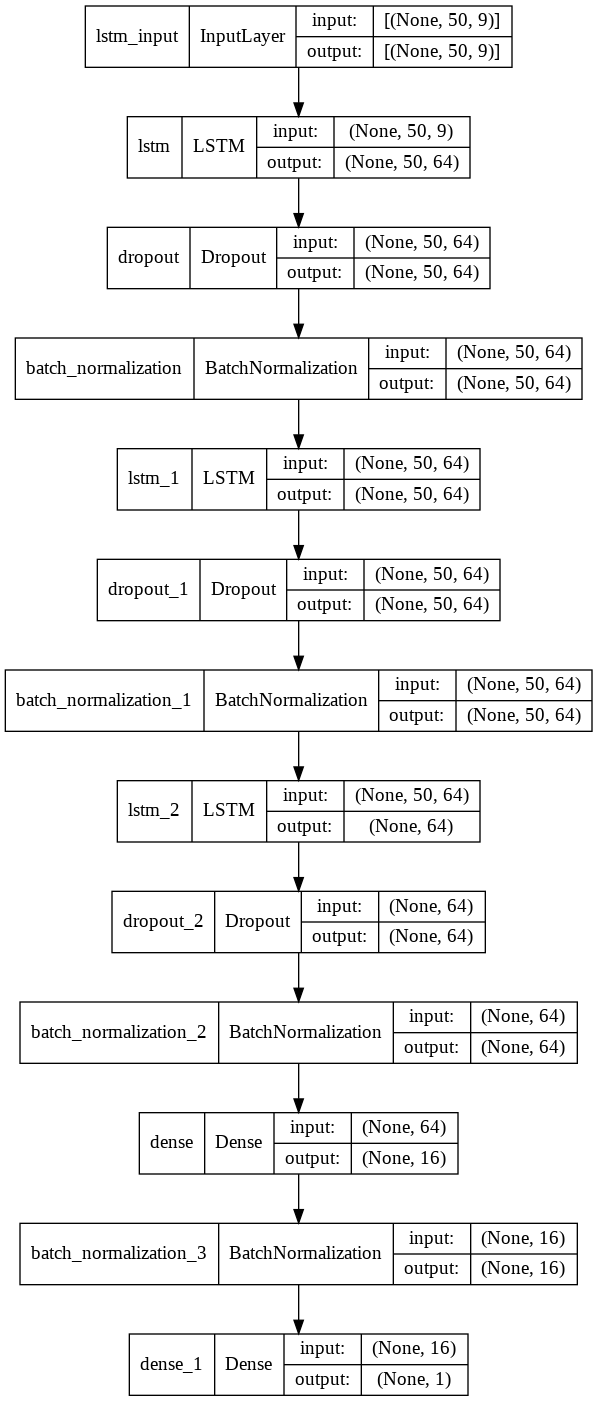

In [61]:
from tensorflow.keras.utils import plot_model
plot_model(RNN_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [62]:
import tensorflow as tf
callback=tf.keras.callbacks.ModelCheckpoint(filepath='./RNN_model.h5',
                                           monitor='mean_squared_error',
                                           verbose=0,
                                           save_best_only=True,
                                           save_weights_only=False,
                                           mode='auto',
                                           save_freq='epoch')
RNN_model.fit(X_train, y_train, epochs = 100, batch_size = 32,callbacks=[callback])

Epoch 1/100
68/68 [==============================] - 14s 43ms/step - loss: 0.1298 - accuracy: 9.3023e-04 - mean_squared_error: 0.1298
Epoch 2/100
68/68 [==============================] - 3s 43ms/step - loss: 0.0177 - accuracy: 9.3023e-04 - mean_squared_error: 0.0177
Epoch 3/100
68/68 [==============================] - 3s 44ms/step - loss: 0.0108 - accuracy: 9.3023e-04 - mean_squared_error: 0.0108
Epoch 4/100
68/68 [==============================] - 3s 43ms/step - loss: 0.0088 - accuracy: 9.3023e-04 - mean_squared_error: 0.0088
Epoch 5/100
68/68 [==============================] - 3s 43ms/step - loss: 0.0069 - accuracy: 9.3023e-04 - mean_squared_error: 0.0069
Epoch 6/100
68/68 [==============================] - 3s 43ms/step - loss: 0.0076 - accuracy: 9.3023e-04 - mean_squared_error: 0.0076
Epoch 7/100
68/68 [==============================] - 3s 44ms/step - loss: 0.0059 - accuracy: 9.3023e-04 - mean_squared_error: 0.0059
Epoch 8/100
68/68 [==============================] - 3s 42ms/step - 

In [64]:
df_test=df_main[1800:2400]
df_target_test=df_test[['Close']]

target_set_test=df_target_test.values
test_set=df_test.values

test_set_scaled = sc.fit_transform(test_set)
target_set_scaled = sc.fit_transform(target_set_test)

X_test = []
y_test = []
for i in range(50,len(test_set)):
    X_test.append(test_set_scaled[i-50:i,:])
    y_test.append(target_set_scaled[i,:])
    
X_test, y_test = np.array(X_test), np.array(y_test)

predicted_stock_price = RNN_model.predict(X_test)

In [65]:
y_test = sc.inverse_transform(y_test)

In [66]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### All over

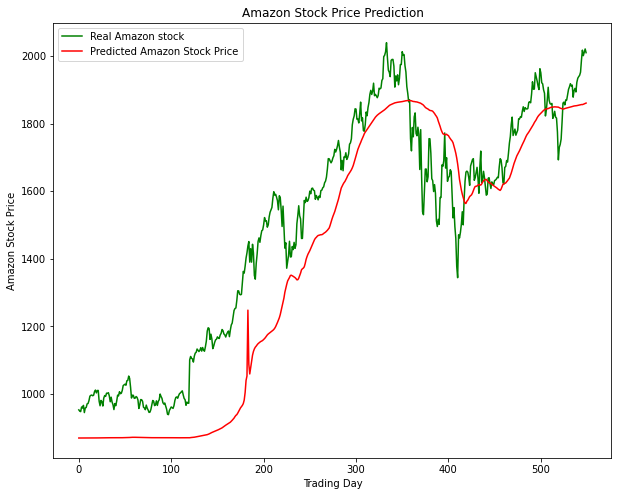

In [67]:
plt.figure(figsize=(10,8))
plt.plot(y_test, color = 'green', label = 'Real Amazon stock')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()

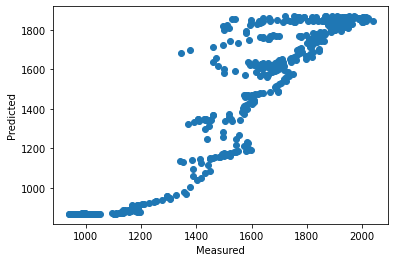

In [68]:
fig, ax = plt.subplots()
ax.scatter(y_test, predicted_stock_price)
ax.plot([y_test[0].min(),y_test[0].max()], [y_test[0].min(), y_test[0].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [69]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,predicted_stock_price))
print("RMSE",np.sqrt(mean_squared_error(y_test,predicted_stock_price)))

MSE 28786.296203379836
RMSE 169.66524748274125


In [70]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predicted_stock_price)
print(r2)

0.7573435108120347


In [71]:
#For Train

In [72]:
df_test=df_main[:2200]
df_target_test=df_test[['Close']]
target_set_test=df_target_test.values
test_set=df_test.values

test_set_scaled = sc.fit_transform(test_set)
target_set_scaled = sc.fit_transform(target_set_test)

X_test = []
y_test = []
for i in range(50,len(test_set)):
    X_test.append(test_set_scaled[i-50:i,:])
    y_test.append(target_set_scaled[i,:])
    
X_test, y_test = np.array(X_test), np.array(y_test)

In [73]:
predicted_stock_price = RNN_model.predict(X_test)

In [74]:
y_test = sc.inverse_transform(y_test)

In [75]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

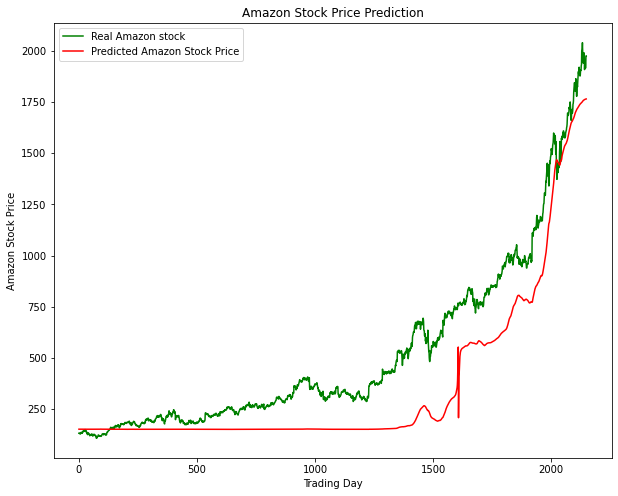

In [76]:
plt.figure(figsize=(10,8))
plt.plot(y_test, color = 'green', label = 'Real Amazon stock')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()

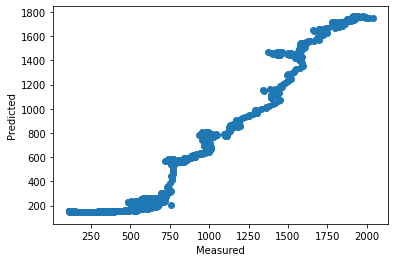

In [77]:
fig, ax = plt.subplots()
ax.scatter(y_test, predicted_stock_price)
ax.plot([y_test[0].min(),y_test[0].max()], [y_test[0].min(), y_test[0].max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [78]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,predicted_stock_price))
print("RMSE",np.sqrt(mean_squared_error(y_test,predicted_stock_price)))

MSE 43870.369844518136
RMSE 209.4525479542279


In [79]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predicted_stock_price)
print(r2)

0.7667765937879595


In [ ]:
### RNN Complete